In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return np.maximum(0,x)

In [3]:
def relu_derivative(x):
    return (x > 0).astype(float)

In [4]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [5]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1 
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

In [6]:
def backward_propagation(X,Y,Z1,A1,Z2,W2):
    m = X.shape[0]
    dZ2 = (Z2 - Y) / m
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)
    return dW1, db1, dW2, db2

In [7]:
def train(X,Y, epochs=100, learning_rate=0.01):
    np.random.seed(42)
    W1 = np.random.randn(2,4) * 0.01
    b1 = np.zeros((1,4))
    W2 = np.random.randn(4,1)*0.01
    b2 = np.zeros((1,1))

    losses = []
    for epoch in range(epochs):
        Z1, A1, Z2 = forward_propagation(X, W1, b1, W2, b2)  
        loss = mse_loss(Y,Z2)
        losses.append(loss)
        dW1, db1, dW2, db2 = backward_propagation(X,Y,Z1,A1,Z2,W2)
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        if epoch % 100 == 0:
            print(f'epoch {epoch}, Loss: {loss:.4f}')
    return W1, b1, W2, b2, losses

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

epoch 0, Loss: 0.5001


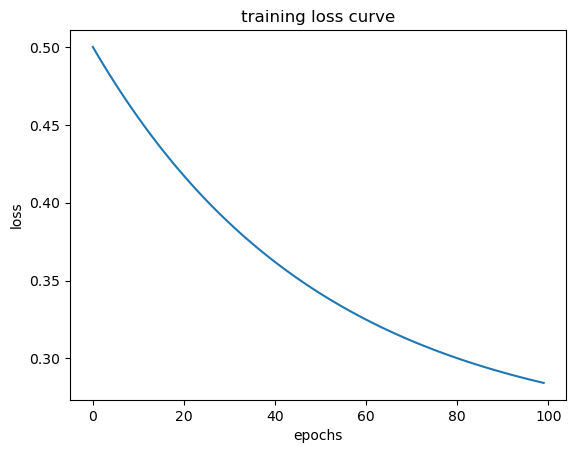

In [9]:
trained_W1, trained_b1, trained_W2, trained_b2, losses = train(X,Y)
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training loss curve')
plt.show()